# Building Machine Learning Model to predict Goal for a User:

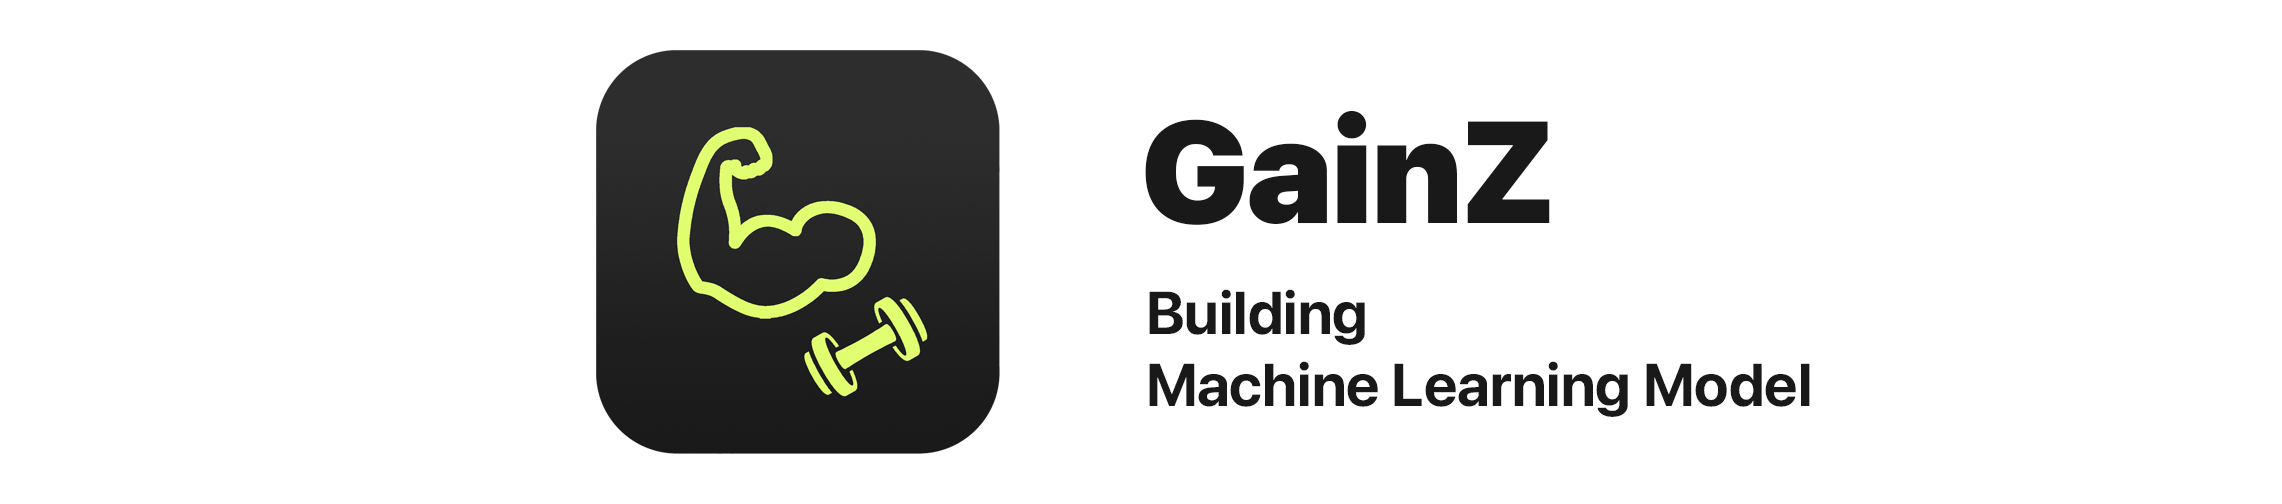

**By Hargun Singh Rana<br>
CSE 6th A<br>
1817965**

##  Importing libraries:

In [390]:
import pandas as pd # Pandas for using the DataFrame object and various other functions
import numpy as np # NumPy for using n-dimentional Arrays
import matplotlib.pyplot as plt # MatPlotLib for plotting graphs
import warnings # Warnings for hiding unwanted warnings
warnings.filterwarnings('ignore')

In [391]:
df= pd.read_csv("NewGainZ.csv") #Importing the data in csv format using the functions of Pandas

In [392]:
df.head() # to print the first 5 rows of the data

,Unnamed: 0,type,department,semester,section,gender,age,height,weight,bmi,bmi_type,fav_sport,act_level,meals,sleep,current_btype,goal,actual_current_btype,goal_suggested
0,0,Student,CSE,6th,A,Male,21,1.8288,68,20.331831,healthy,Gym,high moderate,5,6,fit,Get FIT,fit,Get FIT
1,1,Faculty,CSE,NaN,NONE,Male,36,1.7526,71,23.114938,healthy,Football,low,2,5,fit,Get FIT,fit,Get FIT
2,2,Student,CSE,6th,NONE,Male,25,1.8034,52,15.988923,underweight,Volleyball,low,4,6,skinny,Gain-weight,weak,Gain-weight
3,3,Student,CSE,6th,A,Male,21,1.8034,60,18.448757,healthy,Cricket,moderate,3,6,skinny,Gain-weight,skinny,Get FIT
4,4,Student,CSE,6th,NONE,Female,20,1.5748,30,12.096798,underweight,Racing,moderate,3,7,fit,Get FIT,weak,Gain-weight


## Working on the values of `act_level` attribute:

In [393]:
df.act_level.unique()

array(['high moderate', 'low', 'moderate', 'very high', 'hypteractive'],
      dtype=object)

In [394]:
dict_act_level={'high moderate':'chigh moderate', 'low': 'alow', 'moderate':'bmoderate', 'very high':'dvery high', 'hypteractive':'ehypteractive'}

In [395]:
df['act_level'] = df['act_level'].replace( dict_act_level )

In [396]:
df.act_level.unique()

array(['chigh moderate', 'alow', 'bmoderate', 'dvery high',
       'ehypteractive'], dtype=object)

In [397]:
df.columns

Index(['Unnamed: 0', 'type', 'department', 'semester', 'section', 'gender',
       'age', 'height', 'weight', 'bmi', 'bmi_type', 'fav_sport', 'act_level',
       'meals', 'sleep', 'current_btype', 'goal', 'actual_current_btype',
       'goal_suggested'],
      dtype='object')

In [398]:
df.height= df.height*100

In [399]:
df.head()

,Unnamed: 0,type,department,semester,section,gender,age,height,weight,bmi,bmi_type,fav_sport,act_level,meals,sleep,current_btype,goal,actual_current_btype,goal_suggested
0,0,Student,CSE,6th,A,Male,21,182.88,68,20.331831,healthy,Gym,chigh moderate,5,6,fit,Get FIT,fit,Get FIT
1,1,Faculty,CSE,NaN,NONE,Male,36,175.26,71,23.114938,healthy,Football,alow,2,5,fit,Get FIT,fit,Get FIT
2,2,Student,CSE,6th,NONE,Male,25,180.34,52,15.988923,underweight,Volleyball,alow,4,6,skinny,Gain-weight,weak,Gain-weight
3,3,Student,CSE,6th,A,Male,21,180.34,60,18.448757,healthy,Cricket,bmoderate,3,6,skinny,Gain-weight,skinny,Get FIT
4,4,Student,CSE,6th,NONE,Female,20,157.48,30,12.096798,underweight,Racing,bmoderate,3,7,fit,Get FIT,weak,Gain-weight


## Dropping the unwanted attributes for Model Building:

In [400]:
df=df.drop(['Unnamed: 0','type', 'department', 'semester', 'section','fav_sport','current_btype','goal',"actual_current_btype",'bmi','bmi_type'],axis=1)

In [401]:
df.head()

,gender,age,height,weight,act_level,meals,sleep,goal_suggested
0,Male,21,182.88,68,chigh moderate,5,6,Get FIT
1,Male,36,175.26,71,alow,2,5,Get FIT
2,Male,25,180.34,52,alow,4,6,Gain-weight
3,Male,21,180.34,60,bmoderate,3,6,Get FIT
4,Female,20,157.48,30,bmoderate,3,7,Gain-weight


## Splitting the Independent and Dependent Variables:

In [402]:
x= df.iloc[:,:-1] # Storing all the Independent Variables 
y=df.iloc[:,-1] # Storing all the Dependent Variables 

In [403]:
x.head()

,gender,age,height,weight,act_level,meals,sleep
0,Male,21,182.88,68,chigh moderate,5,6
1,Male,36,175.26,71,alow,2,5
2,Male,25,180.34,52,alow,4,6
3,Male,21,180.34,60,bmoderate,3,6
4,Female,20,157.48,30,bmoderate,3,7


## Encoding the Categorical Values:

In [404]:
from sklearn.preprocessing import LabelEncoder # Importing the LabelEncoder from Sci-Kit Learn Library
le=LabelEncoder() # Assigning it to an object 
x.act_level=le.fit_transform(x.act_level) # Applying the fit and transform function on act_level attribute

In [405]:
x.act_level.unique()

array([2, 0, 1, 3, 4])

In [406]:
x.head()

,gender,age,height,weight,act_level,meals,sleep
0,Male,21,182.88,68,2,5,6
1,Male,36,175.26,71,0,2,5
2,Male,25,180.34,52,0,4,6
3,Male,21,180.34,60,1,3,6
4,Female,20,157.48,30,1,3,7


In [407]:
from sklearn.preprocessing import OneHotEncoder # Importing the OneHotEncoder from Sci-Kit Learn Library
one_hot=OneHotEncoder()

gender_enc=pd.DataFrame(one_hot.fit_transform(df[['gender']]).toarray(), columns= x.gender.unique())

x.insert(0,"gender_f",gender_enc.Female)
x.insert(0,"gender_m",gender_enc.Male)
x=x.drop(['gender'],axis=1)

In [408]:
x

,gender_m,gender_f,age,height,weight,act_level,meals,sleep
0,0.0,1.0,21,182.88,68,2,5,6
1,0.0,1.0,36,175.26,71,0,2,5
2,0.0,1.0,25,180.34,52,0,4,6
3,0.0,1.0,21,180.34,60,1,3,6
4,1.0,0.0,20,157.48,30,1,3,7
...,...,...,...,...,...,...,...,...
158,0.0,1.0,33,175.26,59,0,3,8
159,0.0,1.0,21,187.96,76,1,3,5
160,0.0,1.0,19,177.80,66,3,3,7
161,0.0,1.0,20,165.10,55,1,3,6


## Splitting into Test and Train sets:

In [409]:
from sklearn.model_selection import train_test_split # Importing the Train Test Split from Sci-Kit Learn Library
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [410]:
x_train

,gender_m,gender_f,age,height,weight,act_level,meals,sleep
84,0.0,1.0,18,172.72,52,1,3,7
150,0.0,1.0,22,182.88,80,0,2,8
42,1.0,0.0,43,167.64,63,1,2,6
158,0.0,1.0,33,175.26,59,0,3,8
51,0.0,1.0,17,180.34,70,1,3,8
...,...,...,...,...,...,...,...,...
133,0.0,1.0,21,172.72,52,2,3,7
137,1.0,0.0,21,157.48,46,0,2,8
72,1.0,0.0,20,157.48,75,3,3,7
140,1.0,0.0,20,152.40,40,1,3,7


##  Feature Scaling:


In [411]:
from sklearn.preprocessing import StandardScaler # Importing the Standard Scaler from Sci-Kit Learn Library
ss = StandardScaler() # Assigning it to an object

In [412]:
# Applying Scaling to the Age Attribute
x_train_age=ss.fit_transform(x_train[["age"]])
x_test_age=ss.transform(x_test[["age"]])


# Applying Scaling to the Height Attribute
x_train_height=ss.fit_transform(x_train[["height"]])
x_test_height=ss.transform(x_test[["height"]])


# Applying Scaling to the Weight Attribute
x_train_weight=ss.fit_transform(x_train[["weight"]])
x_test_weight=ss.transform(x_test[["weight"]])

In [413]:
# Replacing the attribute values with scaled values both to test and train sets
x_train.age=x_train_age
x_train.height=x_train_height
x_train.weight=x_train_weight


x_test.age=x_test_age
x_test.height=x_test_height
x_test.weight=x_test_weight

In [414]:
x_train.head()

,gender_m,gender_f,age,height,weight,act_level,meals,sleep
84,0.0,1.0,-0.706058,0.295910,-0.677729,1,3,7
150,0.0,1.0,0.221089,1.275994,1.530807,0,2,8
42,1.0,0.0,5.088613,-0.194132,0.189910,1,2,6
158,0.0,1.0,2.770745,0.540931,-0.125595,0,3,8
51,0.0,1.0,-0.937845,1.030973,0.742044,1,3,8


In [415]:
x_test.head()

,gender_m,gender_f,age,height,weight,act_level,meals,sleep
44,1.0,0.0,-0.010698,-0.929195,-1.466492,3,3,8
47,1.0,0.0,-0.242485,-0.929195,-0.993234,0,2,7
94,0.0,1.0,-0.937845,1.275994,0.347662,3,2,6
78,0.0,1.0,-0.937845,-0.194132,-0.598853,1,3,6
160,0.0,1.0,-0.474272,0.785952,0.426539,3,3,7


# Logistic Regression:


In [416]:
from sklearn.linear_model import LogisticRegression # Importing Logistic Regression Classifier from Sci-kit Learn
classifier = LogisticRegression(random_state=0) # Assigning it to an object
classifier.fit(x_train, y_train) #fitting the training sets in to the Classifer

LogisticRegression(random_state=0)

In [417]:
y_pred=classifier.predict(x_test) # Predicting the values using testing set

Accuracy Score:  87.879 %


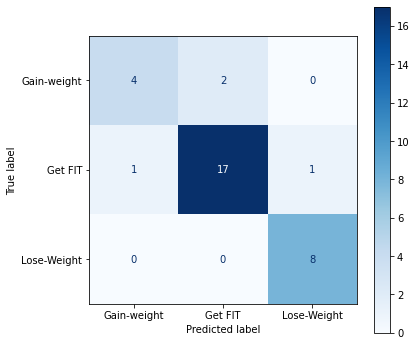

In [418]:
# Checking Accuracy of the data using Confusion Matrix and Accuracy Score
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix 
cm = confusion_matrix(y_test, y_pred)


fig, ax = plt.subplots(figsize=(6,6))
disp = plot_confusion_matrix(classifier, x_test, y_test,
                               labels=np.unique(y),
                               cmap=plt.cm.Blues,ax=ax, )

lr_score= accuracy_score(y_test, y_pred)

print("Accuracy Score: ","{:.3f}".format(lr_score*100),"%")


# Decision Tree Classifier:


In [32]:
# Repeating the same steps of splitting and scaling the data but with different Random states

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=6)#6

## Scaling


from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

#AGE
x_train_age=ss.fit_transform(x_train[["age"]])
x_test_age=ss.transform(x_test[["age"]])


#HEIGHT
x_train_height=ss.fit_transform(x_train[["height"]])
x_test_height=ss.transform(x_test[["height"]])


#WEIGHT
x_train_weight=ss.fit_transform(x_train[["weight"]])
x_test_weight=ss.transform(x_test[["weight"]])

x_train.age=x_train_age
x_train.height=x_train_height
x_train.weight=x_train_weight


x_test.age=x_test_age
x_test.height=x_test_height
x_test.weight=x_test_weight

In [33]:
from sklearn.tree import DecisionTreeClassifier # Importing Decision Tree Classifier from Sci-kit Learn

clf = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=0)

clf = clf.fit(x_train,y_train) # Fitting the training data into classifier

y_pred = clf.predict(x_test) # Predicting the values using testing set

Accuracy Score:  78.788 %


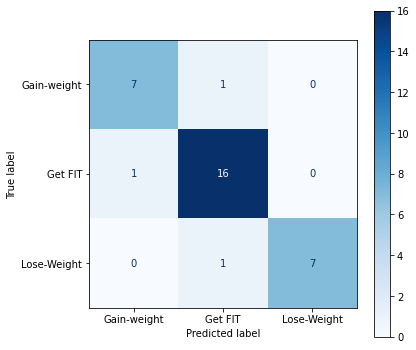

In [34]:
# Checking Accuracy of the data using Confusion Matrix and Accuracy Score
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix
cm = confusion_matrix(y_test, y_pred)


fig, ax = plt.subplots(figsize=(6,6))
disp = plot_confusion_matrix(classifier, x_test, y_test,
                               labels=np.unique(y),
                               cmap=plt.cm.Blues,ax=ax)

dt_score= accuracy_score(y_test, y_pred)
print("Accuracy Score: ","{:.3f}".format(dt_score*100),"%")



# Random Forest Classifer:

In [35]:
# Repeating the same steps of splitting and scaling the data but with different Random states

from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=6)#6

## Scaling


from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

#AGE
x_train_age=ss.fit_transform(x_train[["age"]])
x_test_age=ss.transform(x_test[["age"]])


#HEIGHT
x_train_height=ss.fit_transform(x_train[["height"]])
x_test_height=ss.transform(x_test[["height"]])


#WEIGHT
x_train_weight=ss.fit_transform(x_train[["weight"]])
x_test_weight=ss.transform(x_test[["weight"]])

x_train.age=x_train_age
x_train.height=x_train_height
x_train.weight=x_train_weight


x_test.age=x_test_age
x_test.height=x_test_height
x_test.weight=x_test_weight

In [36]:
from sklearn.ensemble import RandomForestClassifier # Importing Decision Tree Classifier from Sci-kit Learn
clf=RandomForestClassifier(n_estimators=100,max_features=5) 
clf=clf.fit(x_train,y_train) # Fitting the training data into classifier

y_pred=clf.predict(x_test) # Predicting the values using testing set

Accuracy Score:  84.848 %


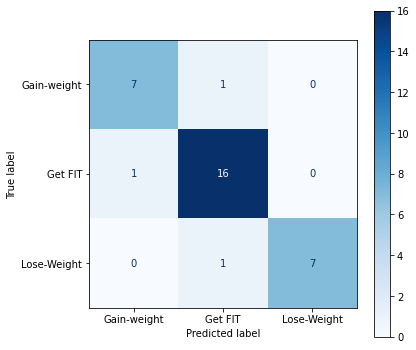

In [37]:
# Checking Accuracy of the data using Confusion Matrix and Accuracy Score
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix
cm = confusion_matrix(y_test, y_pred)


fig, ax = plt.subplots(figsize=(6,6))
disp = plot_confusion_matrix(classifier, x_test, y_test,
                               labels=np.unique(y),
                               cmap=plt.cm.Blues,ax=ax)
rf_score = accuracy_score(y_test, y_pred)
print("Accuracy Score: ","{:.3f}".format(rf_score*100),"%")




# Naive bayes Classifier:

In [38]:
# Repeating the same steps of splitting and scaling the data but with different Random states

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)#6

## Scaling


from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

#AGE
x_train_age=ss.fit_transform(x_train[["age"]])
x_test_age=ss.transform(x_test[["age"]])


#HEIGHT
x_train_height=ss.fit_transform(x_train[["height"]])
x_test_height=ss.transform(x_test[["height"]])


#WEIGHT
x_train_weight=ss.fit_transform(x_train[["weight"]])
x_test_weight=ss.transform(x_test[["weight"]])

x_train.age=x_train_age
x_train.height=x_train_height
x_train.weight=x_train_weight


x_test.age=x_test_age
x_test.height=x_test_height
x_test.weight=x_test_weight

In [39]:
from sklearn.naive_bayes import GaussianNB # Importing Decision Tree Classifier from Sci-kit Learn

g1 = GaussianNB()
g1.fit(x_train, y_train) # Fitting the training data into classifier
  

y_pred = g1.predict(x_test) # Predicting the values using testing set
  

Accuracy Score:  72.727 %


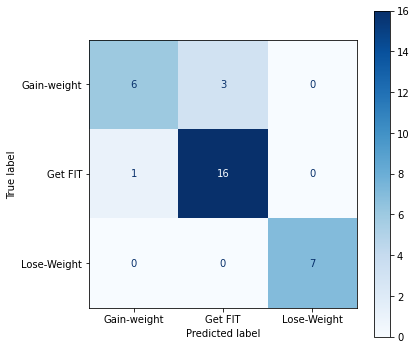

In [40]:
# Checking Accuracy of the data using Confusion Matrix and Accuracy Score
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix
cm = confusion_matrix(y_test, y_pred)


fig, ax = plt.subplots(figsize=(6,6))
disp = plot_confusion_matrix(classifier, x_test, y_test,
                               labels=np.unique(y),
                               cmap=plt.cm.Blues,ax=ax)

nb_score = accuracy_score(y_test, y_pred)
print("Accuracy Score: ","{:.3f}".format(nb_score*100),"%")

# Support Vector Machine Classifier:

In [41]:
# Repeating the same steps of splitting and scaling the data but with different Random states

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)#14

## Scaling


from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

#AGE
x_train_age=ss.fit_transform(x_train[["age"]])
x_test_age=ss.transform(x_test[["age"]])


#HEIGHT
x_train_height=ss.fit_transform(x_train[["height"]])
x_test_height=ss.transform(x_test[["height"]])


#WEIGHT
x_train_weight=ss.fit_transform(x_train[["weight"]])
x_test_weight=ss.transform(x_test[["weight"]])

x_train.age=x_train_age
x_train.height=x_train_height
x_train.weight=x_train_weight


x_test.age=x_test_age
x_test.height=x_test_height
x_test.weight=x_test_weight

In [42]:
from sklearn.svm import SVC # Importing Decision Tree Classifier from Sci-kit Learn

svclassifier = SVC(kernel='poly')
svclassifier.fit(x_train, y_train) # Fitting the training data into classifier
y_pred = svclassifier.predict(x_test) # Predicting the values using testing set

Accuracy Score:  75.758 %


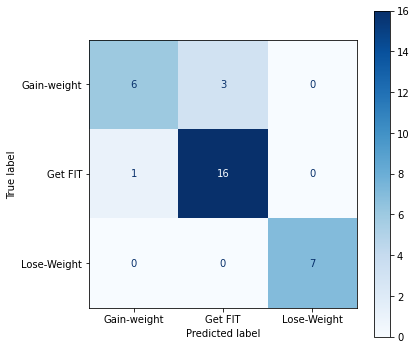

In [43]:
# Checking Accuracy of the data using Confusion Matrix and Accuracy Score
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix
cm = confusion_matrix(y_test, y_pred)


fig, ax = plt.subplots(figsize=(6,6))
disp = plot_confusion_matrix(classifier, x_test, y_test,
                               labels=np.unique(y),
                               cmap=plt.cm.Blues,ax=ax)

svm_score= accuracy_score(y_test, y_pred)
print("Accuracy Score: ","{:.3f}".format(svm_score*100),"%")

# Artificial Neural Network:

In [267]:
# Repeating the same steps of splitting and scaling the data but with different Random states
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=14)#14

## Scaling


from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

#AGE
x_train_age=ss.fit_transform(x_train[["age"]])
x_test_age=ss.transform(x_test[["age"]])


#HEIGHT
x_train_height=ss.fit_transform(x_train[["height"]])
x_test_height=ss.transform(x_test[["height"]])


#WEIGHT
x_train_weight=ss.fit_transform(x_train[["weight"]])
x_test_weight=ss.transform(x_test[["weight"]])

x_train.age=x_train_age
x_train.height=x_train_height
x_train.weight=x_train_weight


x_test.age=x_test_age
x_test.height=x_test_height
x_test.weight=x_test_weight

In [298]:
from sklearn.neural_network import MLPClassifier # Importing Decision Tree Classifier from Sci-kit Learn


In [299]:
# for simplicity we will choose 3 layers with the same 2*n+1 number of neurons :
mlp = MLPClassifier(hidden_layer_sizes=(9,9,9)) # Fitting the training data into classifier

In [300]:
mlp.fit(x_train,y_train)

MLPClassifier(hidden_layer_sizes=(9, 9, 9))

In [301]:
predictions = mlp.predict(x_test) # Predicting the values using testing set

In [302]:
# Checking Accuracy of the data using Confusion Matrix and Accuracy Score
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))

[[ 7  1  0]
 [ 1 15  1]
 [ 0  0  8]]


In [303]:
ann_score= accuracy_score(y_test, predictions)
print("Accuracy Score: ","{:.3f}".format(ann_score*100),"%")

Accuracy Score:  90.909 %


## Final Results:

In [305]:
print("Logistic Regression:","{:.3f}".format(lr_score*100),"%")
print("Decision Tree:","{:.3f}".format(dt_score*100),"%")
print("Random Forest:","{:.3f}".format(rf_score*100),"%")
print("Naive Bayes:","{:.3f}".format(nb_score*100),"%")
print("Support Vector Machine:","{:.3f}".format(svm_score*100),"%")
print("Artificial Neural Network:","{:.3f}".format(ann_score*100),"%")

Logistic Regression: 87.879 %
Decision Tree: 78.788 %
Random Forest: 84.848 %
Naive Bayes: 72.727 %
Support Vector Machine: 75.758 %
Artificial Neural Network: 90.909 %


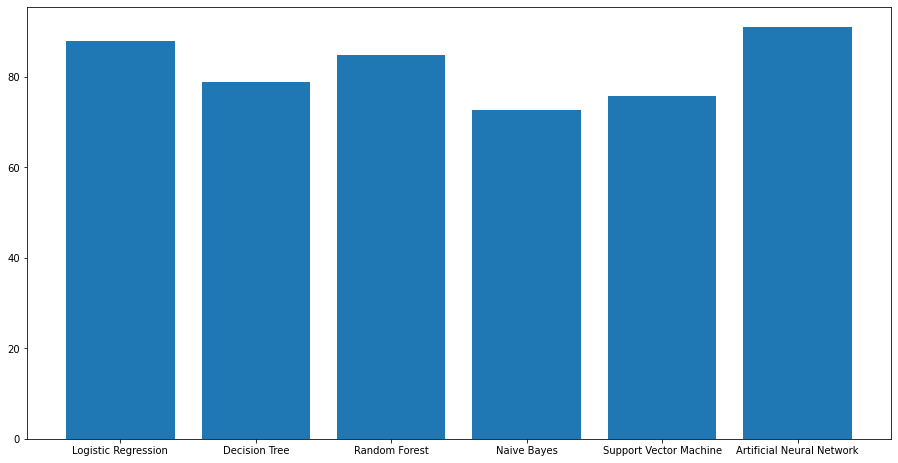

In [7]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 6))
ax = fig.add_axes([0,0,1,1])
langs = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'Support Vector Machine','Artificial Neural Network']
students = [lr_score,dt_score,rf_score,nb_score,svm_score,ann_score]

ax.bar(langs,students)
plt.show()

The Accuracy Scorein Descending Order:<br> **ANN** of 90%, <br>**Logistic Regression** of 87%, <br>**Random Forest** of 84%, <br>**Decision Tree** of 78%,<br>**SVM** of 75% <br>**Naive Bayes** of 72%

 Since the most accurate results are given by **Artificial Neural Network**, we will use that model for deployment on the iOS App 

## Exporting pickle file :

In [307]:
import pickle # Importing Pickle Module
file_name="GainZ_ANN_Model" # Setting a file name for the Model File
pickle.dump(mlp,open(file_name,'wb')) # Applying the Dump function to export the Model File